In [ ]:
from model_train import *
from model_evaluate import *

In [2]:
X_train, y_train  = load_processed_data()
models = train_models(X_train, y_train)

 Tải dữ liệu thành công!

 Huấn luyện mô hình: Linear Regression ...
 Hoàn tất huấn luyện Linear Regression!

 Huấn luyện mô hình: Random Forest ...
 Hoàn tất huấn luyện Random Forest!

 Huấn luyện mô hình: XGBoost (MultiOutput) ...
 Hoàn tất huấn luyện XGBoost (MultiOutput)!


 Tải dữ liệu dev thành công!

--- Hiệu suất (Linear Regression (Dev Set)) ---
  target_temp_t+1: MAE = 1.1685, RMSE = 1.5272
  target_temp_t+2: MAE = 1.6681, RMSE = 2.1615
  target_temp_t+3: MAE = 1.9236, RMSE = 2.4626
  target_temp_t+4: MAE = 1.9752, RMSE = 2.5389
  target_temp_t+5: MAE = 1.9978, RMSE = 2.5609
  ---------------------------------
  Average All Horizons: MAE = 1.7466, RMSE = 2.2836

--- Hiệu suất (Random Forest (Dev Set)) ---
  target_temp_t+1: MAE = 1.2915, RMSE = 1.6460
  target_temp_t+2: MAE = 1.8011, RMSE = 2.3020
  target_temp_t+3: MAE = 2.0796, RMSE = 2.6564
  target_temp_t+4: MAE = 2.1625, RMSE = 2.7805
  target_temp_t+5: MAE = 2.1410, RMSE = 2.7562
  ---------------------------------
  Average All Horizons: MAE = 1.8951, RMSE = 2.4655

--- Hiệu suất (XGBoost (MultiOutput) (Dev Set)) ---
  target_temp_t+1: MAE = 1.1620, RMSE = 1.5563
  target_temp_t+2: MAE = 1.7134, RMSE = 2.2508
  target_temp_t+3: MAE = 2.0614, RMSE = 2.7148
  target_temp_t+4: MAE = 2.1513, RMSE

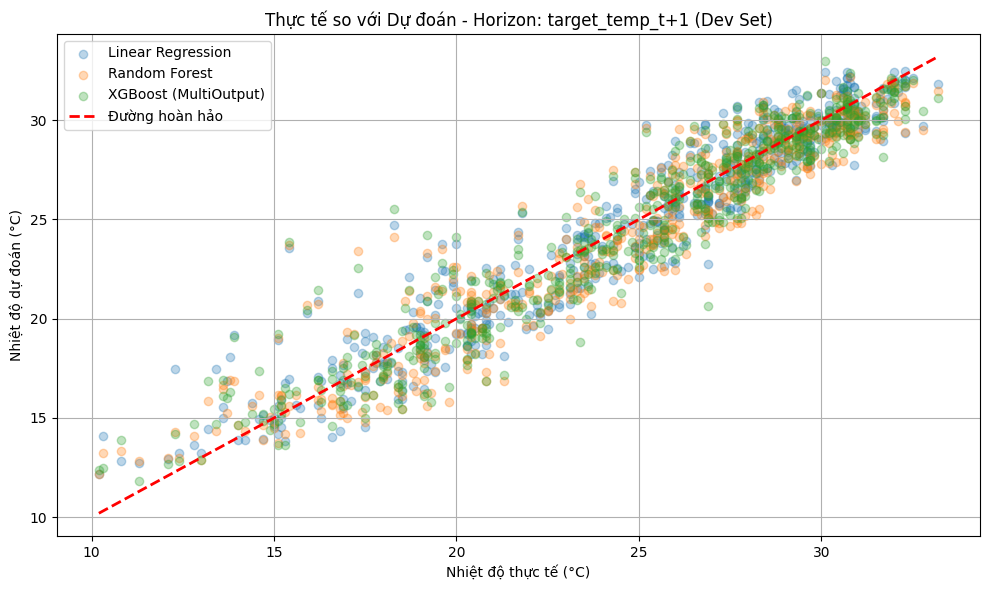

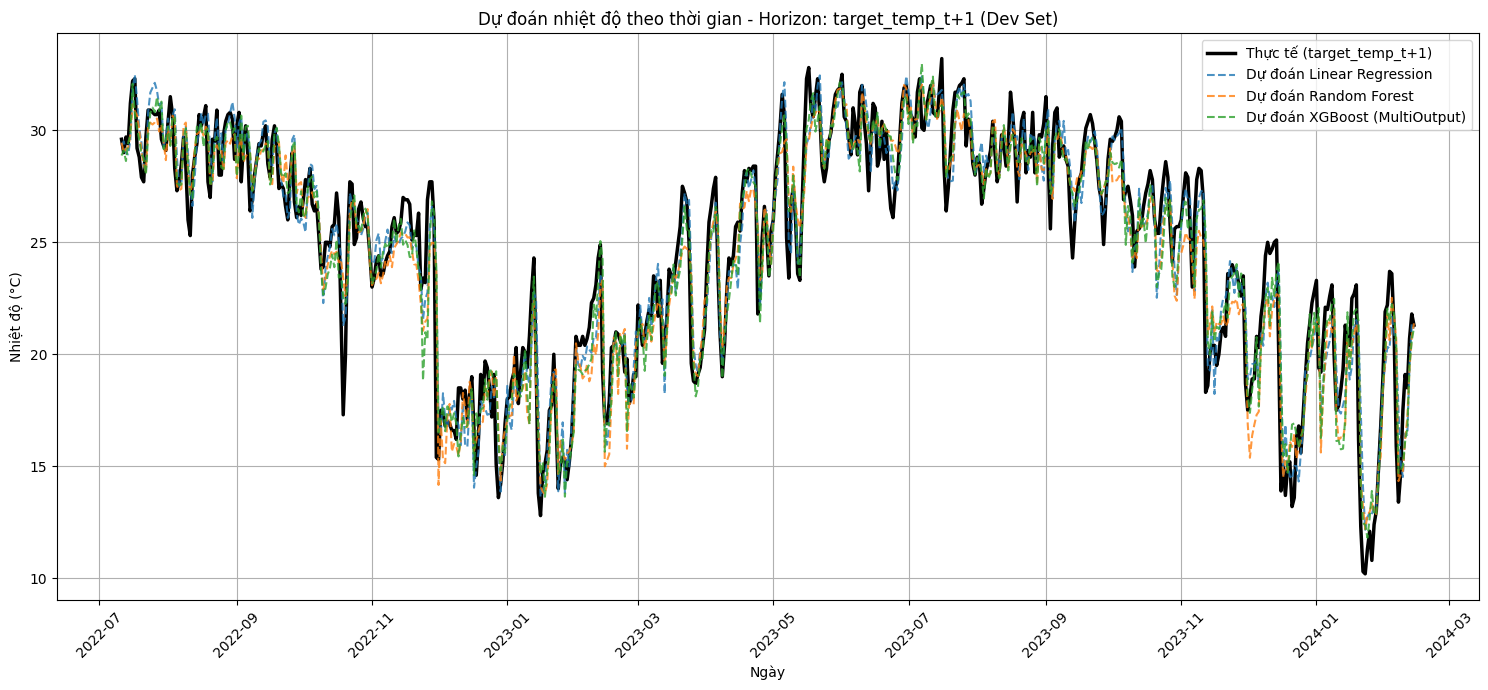

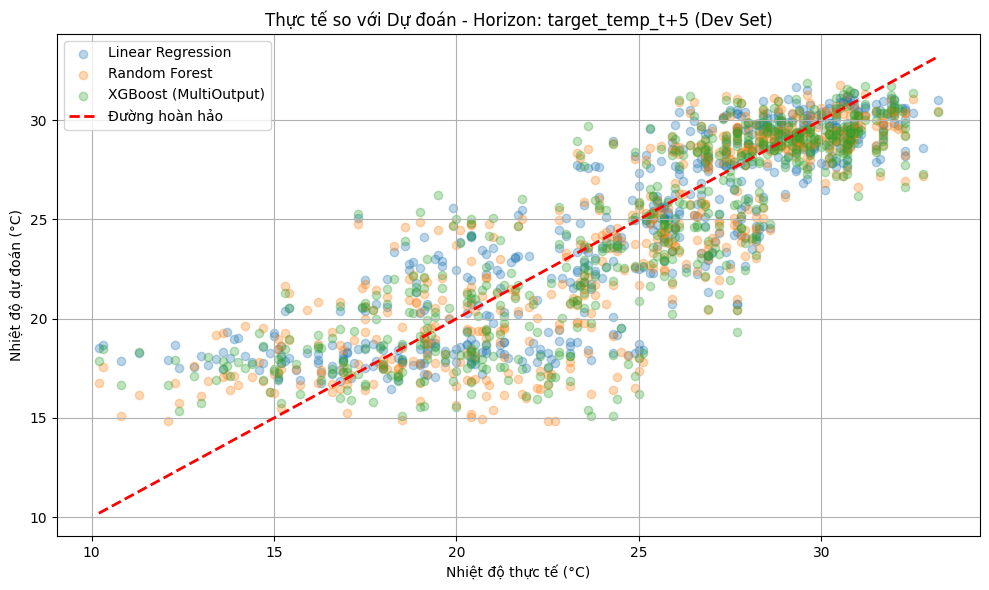

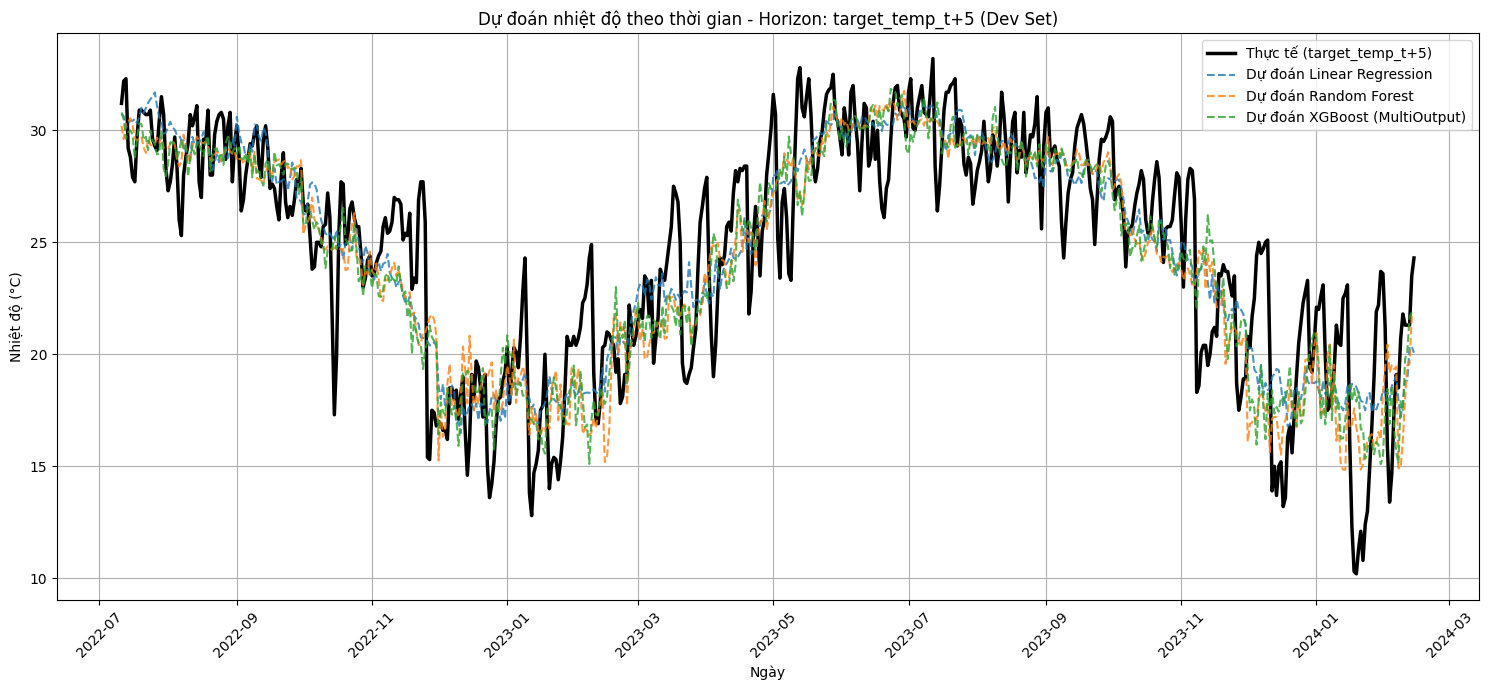


 Tổng hợp kết quả (Metrics) trên tập Development:
                       target_temp_t+1_MAE  target_temp_t+1_RMSE  \
Linear Regression                   1.1685                1.5272   
Random Forest                       1.2915                1.6460   
XGBoost (MultiOutput)               1.1620                1.5563   

                       target_temp_t+2_MAE  target_temp_t+2_RMSE  \
Linear Regression                   1.6681                2.1615   
Random Forest                       1.8011                2.3020   
XGBoost (MultiOutput)               1.7134                2.2508   

                       target_temp_t+3_MAE  target_temp_t+3_RMSE  \
Linear Regression                   1.9236                2.4626   
Random Forest                       2.0796                2.6564   
XGBoost (MultiOutput)               2.0614                2.7148   

                       target_temp_t+4_MAE  target_temp_t+4_RMSE  \
Linear Regression                   1.9752                2.53

In [3]:
X_dev, y_dev = load_dev_data()
run_evaluation_and_visualize(models, X_dev, y_dev)

In [4]:
best_model_metadata = {
    "Linear Regression": models['Linear Regression'],
}


In [5]:
X_train_full, y_train_full = pd.concat([X_train, X_dev]), pd.concat([y_train, y_dev])

final_model = train_models(X_train_full, y_train_full, best_model_metadata)



 Huấn luyện mô hình: Linear Regression ...
 Hoàn tất huấn luyện Linear Regression!



--- Hiệu suất (Linear Regression (Dev Set)) ---
  target_temp_t+1: MAE = 1.1569, RMSE = 1.4961
  target_temp_t+2: MAE = 1.5302, RMSE = 1.9736
  target_temp_t+3: MAE = 1.7022, RMSE = 2.1889
  target_temp_t+4: MAE = 1.7791, RMSE = 2.2684
  target_temp_t+5: MAE = 1.8005, RMSE = 2.2945
  ---------------------------------
  Average All Horizons: MAE = 1.5938, RMSE = 2.0657

 Đang tạo biểu đồ trực quan hóa (Dev Set)...


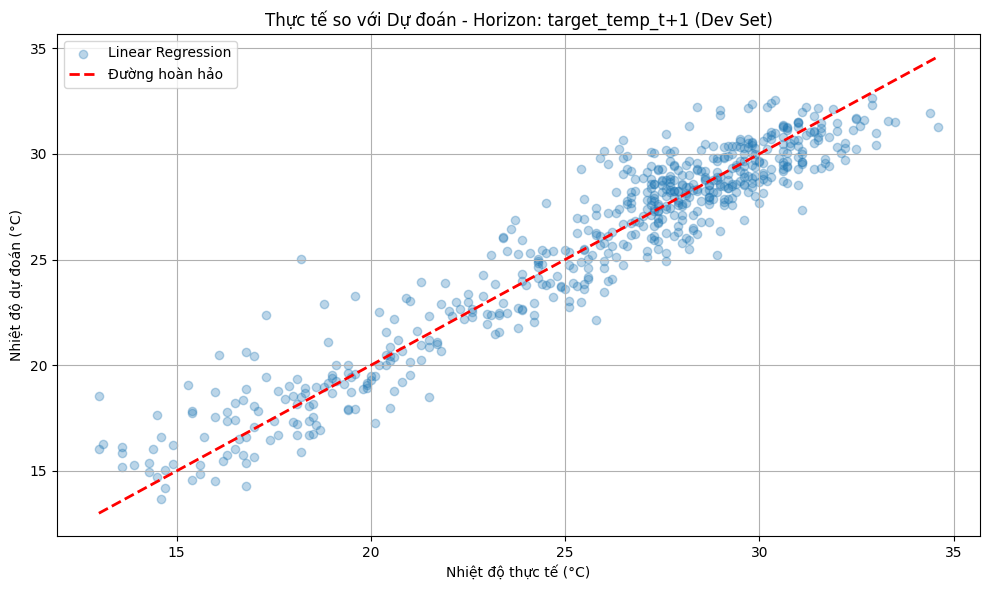

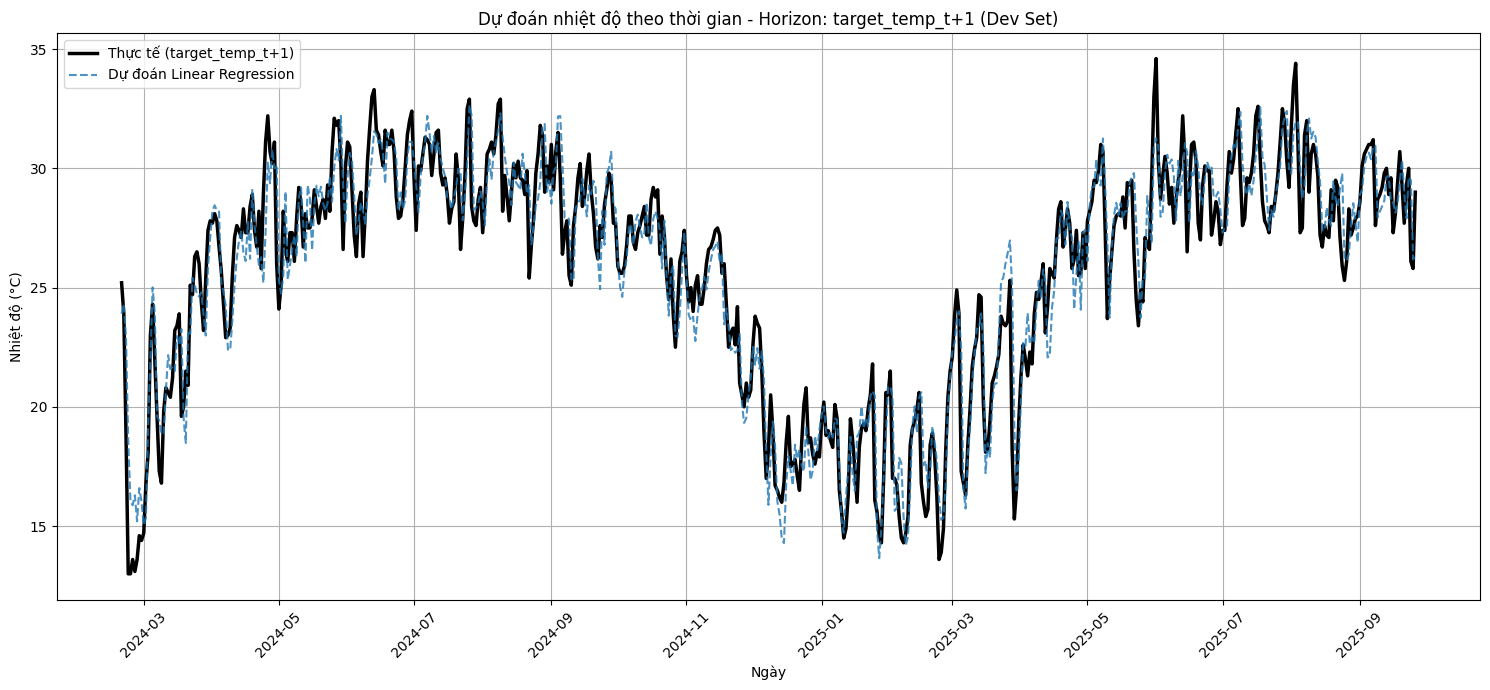

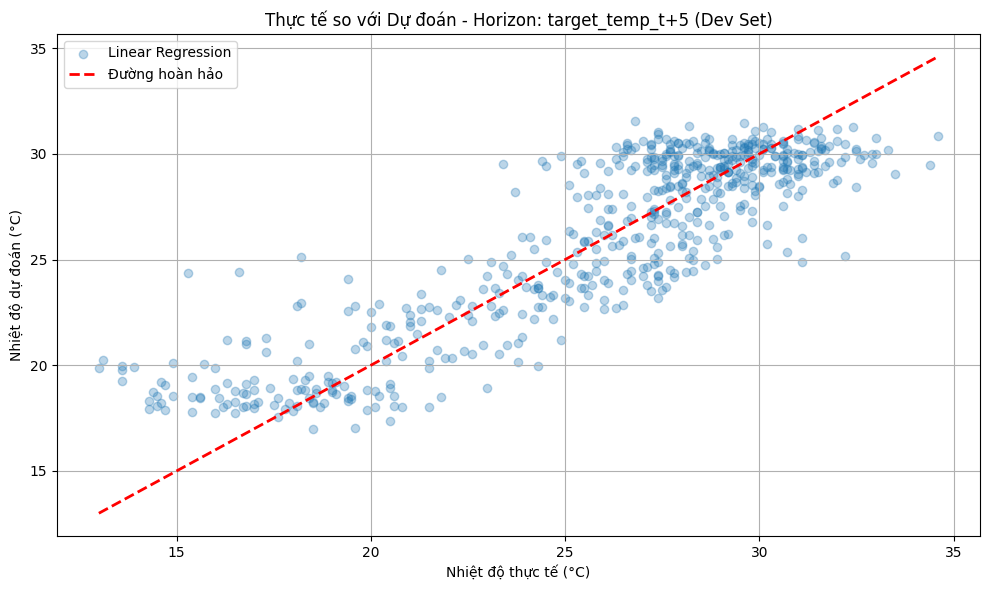

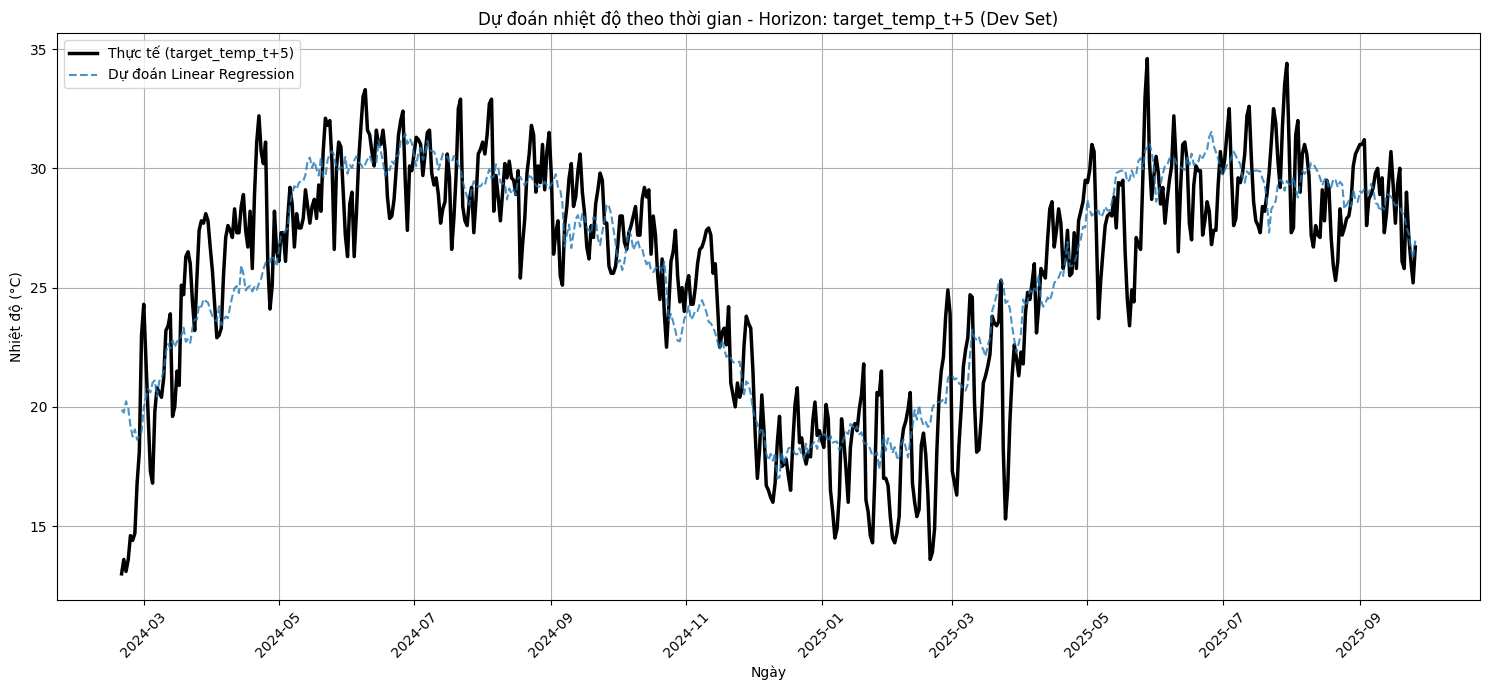


 Tổng hợp kết quả (Metrics) trên tập Development:
                   target_temp_t+1_MAE  target_temp_t+1_RMSE  \
Linear Regression               1.1569                1.4961   

                   target_temp_t+2_MAE  target_temp_t+2_RMSE  \
Linear Regression               1.5302                1.9736   

                   target_temp_t+3_MAE  target_temp_t+3_RMSE  \
Linear Regression               1.7022                2.1889   

                   target_temp_t+4_MAE  target_temp_t+4_RMSE  \
Linear Regression               1.7791                2.2684   

                   target_temp_t+5_MAE  target_temp_t+5_RMSE  Average_MAE  \
Linear Regression               1.8005                2.2945       1.5938   

                   Average_RMSE  
Linear Regression        2.0657  

Đã lưu kết quả đánh giá vào 'processed_data/model_evaluation_results.csv'


In [6]:
X_test = pd.read_csv('processed_data/X_test_transformed.csv', index_col='datetime', parse_dates=True)
y_test = pd.read_csv('processed_data/y_test.csv', index_col='datetime', parse_dates=True)
run_evaluation_and_visualize(final_model, X_test, y_test)

In [7]:
import joblib
joblib.dump(final_model, 'best_model.pkl')

['best_model.pkl']